## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [73]:
# Your code here - remember to use markdown cells for comments as well!
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [74]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [76]:
df['view'] = df['view'].fillna(value="NONE")
df['waterfront'] = df['waterfront'].fillna(value="N/A")
df['yr_renovated'] = df['yr_renovated'].fillna(value= 0.0)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: x.replace("?", "0.0"))
df['sqft_basement'] = df['sqft_basement'].astype("float64")
df['grade'] = df["grade"].str.split(" ").str[0].astype('int64')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [78]:
training_data = df.sample(frac = 0.75, random_state=25)
x_train = training_data.drop('price', axis=1)
y_train = training_data['price']

testing_data = df.drop(training_data.index)
x_test = testing_data.drop('price', axis =1)
y_test = testing_data['price']

### Build a baseline Model

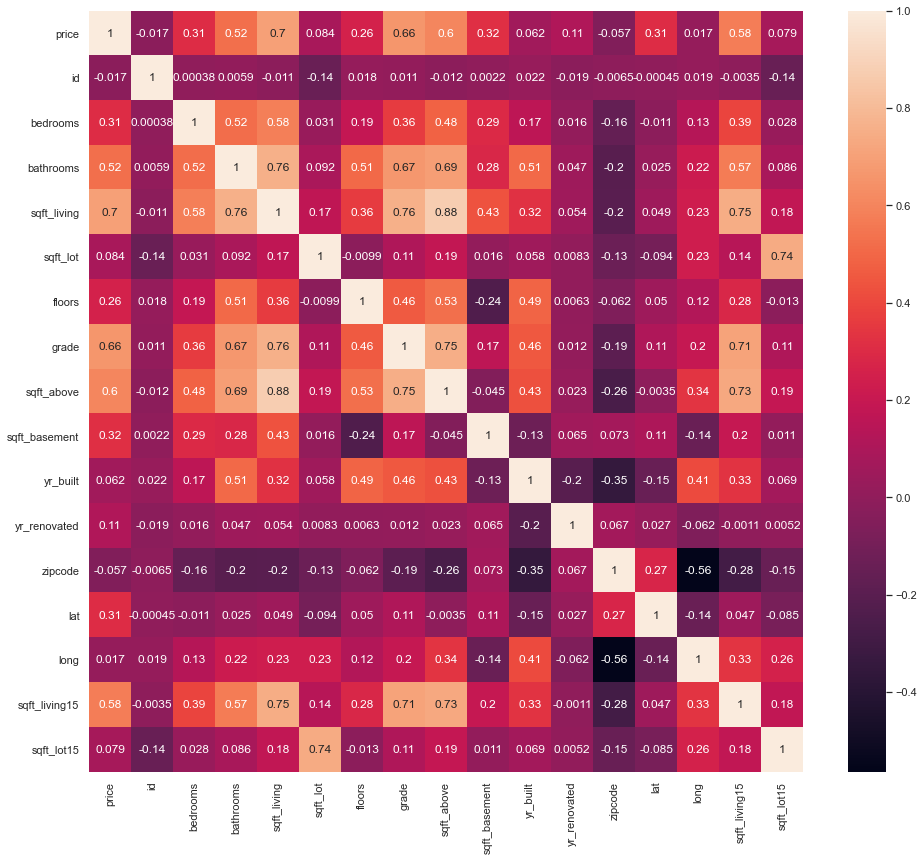

In [80]:
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()
sns.set(rc={'figure.figsize':(16, 14)})
sns.heatmap(data=corr, annot=True);

In [81]:
price_corrs = heatmap_data.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.698207
grade            0.661352
sqft_above       0.604313
sqft_living15    0.577119
bathrooms        0.523714
sqft_basement    0.318573
bedrooms         0.308370
lat              0.305144
floors           0.258338
yr_renovated     0.114312
sqft_lot         0.083760
sqft_lot15       0.078966
yr_built         0.062215
zipcode          0.056704
long             0.017179
id               0.016776
Name: price, dtype: float64

In [82]:
# house_preds = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']]
# house_target = df['price']
# lr = LinearRegression().fit(house_preds, house_target)
# lr.score(house_preds, house_target)
# ## multicollinear problem as 0.88, 0.76, 0.76 are pretty high

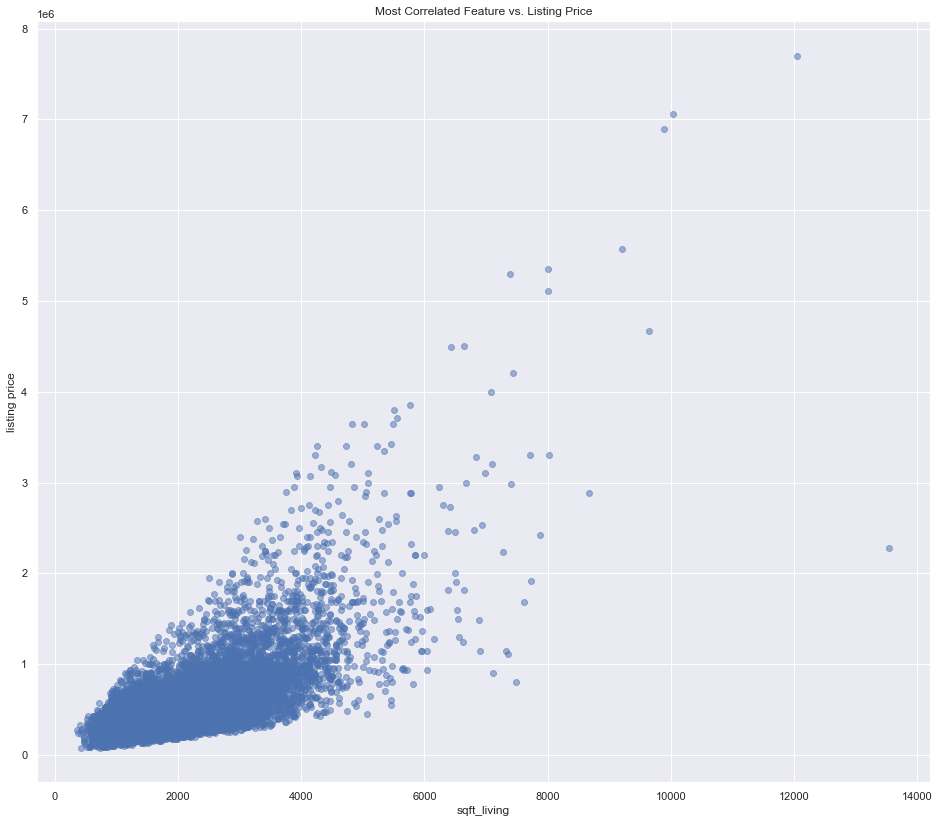

In [83]:
most_correlated_feature = "sqft_living"

fig, ax = plt.subplots()
ax.scatter(x_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [85]:
baseline_model = LinearRegression()

In [103]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.75, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.49108895229656085
Validation score: 0.4851692639222354


In [92]:
baseline_scores

{'fit_time': array([0.00299311, 0.00199461, 0.00199461]),
 'score_time': array([0.00099564, 0.00199437, 0.0009973 ]),
 'test_score': array([0.47736303, 0.4869101 , 0.47771227]),
 'train_score': array([0.49723854, 0.48785359, 0.4938105 ])}

### Model with Only Numeric Features

In [105]:
x_train_numeric = x_train.select_dtypes("number").copy()
x_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3990,8631600025,4,1.50,2290,8773,1.0,7,1330,960.0,1947,0.0,98133,47.7173,-122.330,1740,7058
16939,2223059099,3,1.50,1500,10018,1.0,7,1500,0.0,1957,0.0,98058,47.4680,-122.163,1500,10937
9533,2919200665,3,1.75,2145,3840,1.5,8,2145,0.0,1910,0.0,98103,47.6875,-122.357,1140,3840
6473,9512500460,3,1.50,1560,9350,1.0,7,1220,340.0,1969,0.0,98052,47.6729,-122.148,1870,8671
15787,2044500213,4,2.00,1870,6000,1.5,7,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,1545800290,4,2.50,1700,6675,2.0,7,1700,0.0,1997,0.0,98038,47.3638,-122.053,1570,7540
8986,7795810110,3,1.75,1430,9857,1.0,7,1140,290.0,1980,0.0,98045,47.4964,-121.771,1310,9880
17312,8651410670,3,1.00,920,6460,1.0,6,920,0.0,1969,0.0,98042,47.3665,-122.082,920,4770
10737,3317500070,4,2.75,3840,10004,1.0,9,2110,1730.0,1963,0.0,98040,47.5606,-122.225,3500,12118


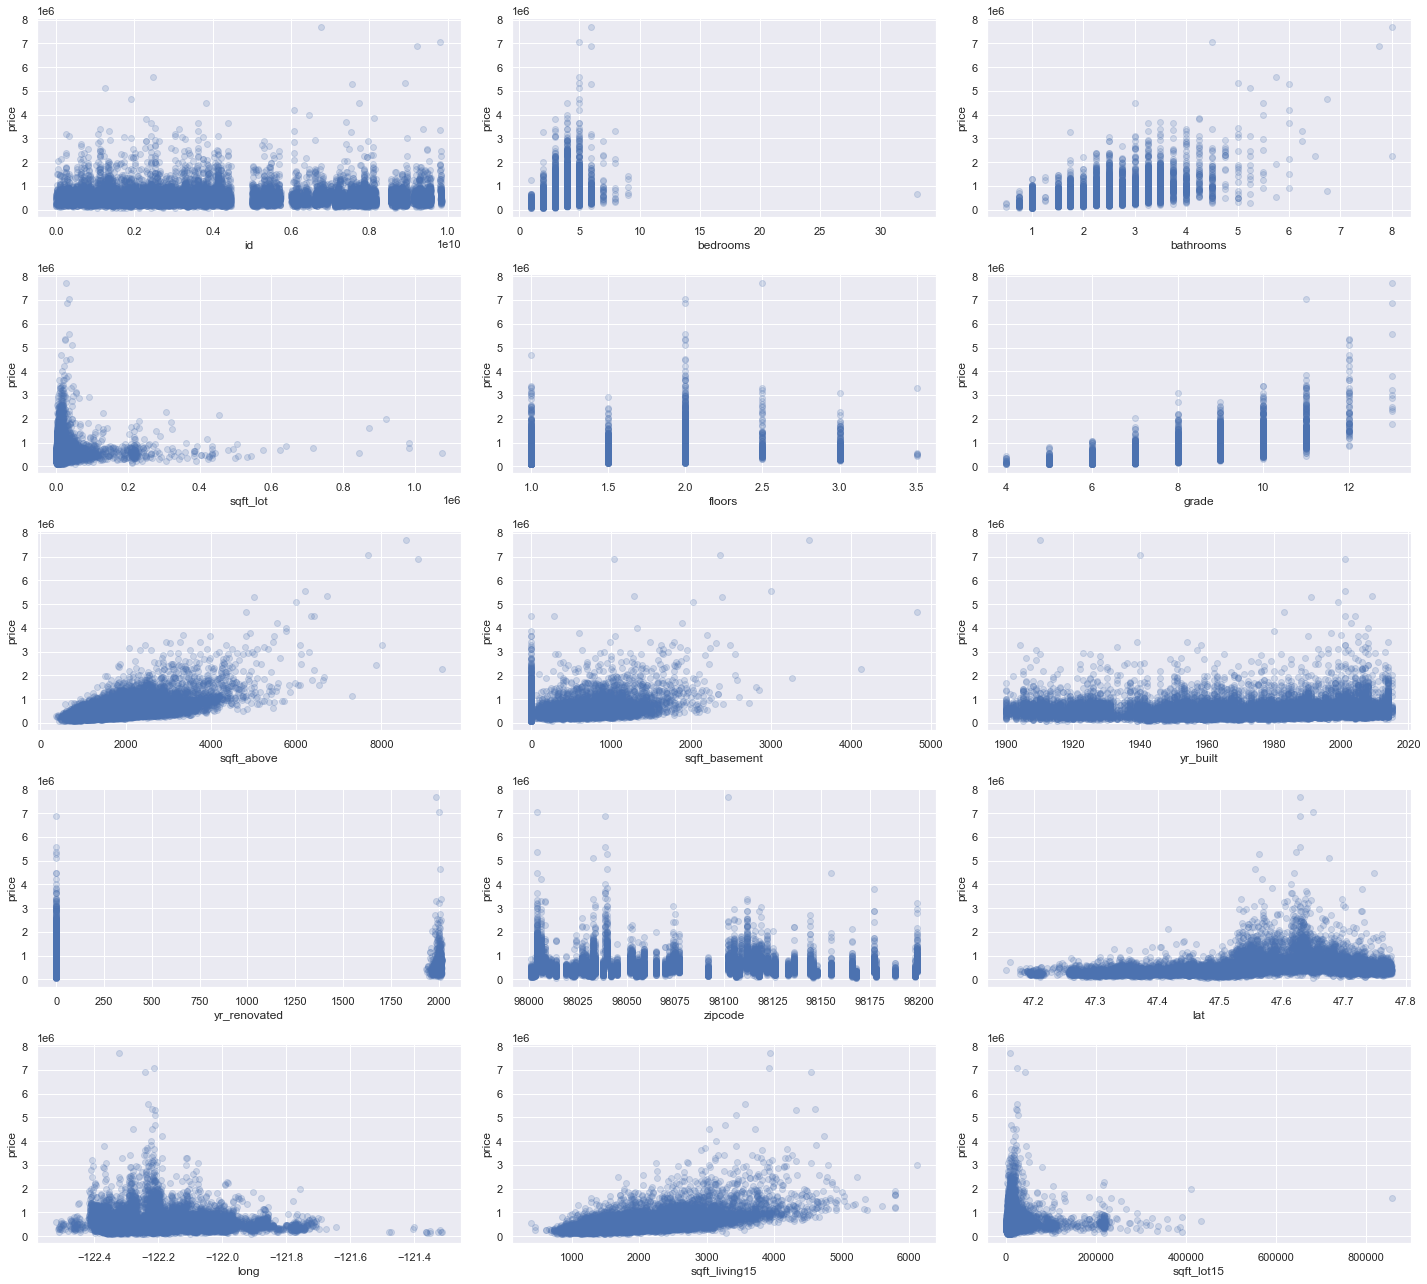

In [109]:
scatterplot_data = x_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 18))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(x_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [110]:
## drop id, 
x_train_second_model = x_train_numeric.drop('id', axis=1).copy()

x_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3990,4,1.50,2290,8773,1.0,7,1330,960.0,1947,0.0,98133,47.7173,-122.330,1740,7058
16939,3,1.50,1500,10018,1.0,7,1500,0.0,1957,0.0,98058,47.4680,-122.163,1500,10937
9533,3,1.75,2145,3840,1.5,8,2145,0.0,1910,0.0,98103,47.6875,-122.357,1140,3840
6473,3,1.50,1560,9350,1.0,7,1220,340.0,1969,0.0,98052,47.6729,-122.148,1870,8671
15787,4,2.00,1870,6000,1.5,7,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,4,2.50,1700,6675,2.0,7,1700,0.0,1997,0.0,98038,47.3638,-122.053,1570,7540
8986,3,1.75,1430,9857,1.0,7,1140,290.0,1980,0.0,98045,47.4964,-121.771,1310,9880
17312,3,1.00,920,6460,1.0,6,920,0.0,1969,0.0,98042,47.3665,-122.082,920,4770
10737,4,2.75,3840,10004,1.0,9,2110,1730.0,1963,0.0,98040,47.5606,-122.225,3500,12118


In [112]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=x_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6537100946151145
Validation score: 0.6467634981194437

Baseline Model
Train score:      0.49108895229656085
Validation score: 0.4851692639222354


### select the best combinations of features

In [115]:
sm.OLS(y_train, sm.add_constant(x_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2013.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        16:45:21   Log-Likelihood:            -2.2214e+05
No. Observations:               16198   AIC:                         4.443e+05
Df Residuals:                   16182   BIC:                         4.444e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.635e+06   3.62e+06      0.451      0.652   -5.47e+06    8.74e+06
bedrooms      -4.569e+04   2356.795    -19.384      0.000   -5.03e+04   -4.11e+04
bathrooms      4.334e+04   4095.454     10.581      0.000    3.53e+04    5.14e+04
sqft_living     134.7116     22.276      6.047      0.000      91.049     178.375
sqft_lot          0.0965      0.066      1.458      0.145      -0.033       0.226
floors         5808.9236   4516.465      1.286      0.198   -3043.847    1.47e+04
grade          1.018e+05   2712.351     37.521      0.000    9.65e+04    1.07e+05
sqft_above       59.4924     22.247      2.674      0.007      15.885     103.099
sqft_basement    50.4627     22.079      2.286      0.022       7.185      93.741
yr_built      -3077.1706     85.427    -36.021      0.000   -3244.616   -2909.725
yr_renovated     27.0972      4.890      5.541      0.000      17.512      36.682
zipcode        -564.0488     41.135    -13.712      0.000    -644.677    -483.420
lat            5.593e+05   1.34e+04     41.879      0.000    5.33e+05    5.85e+05
long          -2.659e+05   1.64e+04    -16.184      0.000   -2.98e+05   -2.34e+05
sqft_living15    36.1976      4.239      8.539      0.000      27.889      44.506
sqft_lot15       -0.2438      0.097     -2.512      0.012      -0.434      -0.054
==============================================================================
Omnibus:                    15107.223   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1685598.636
Skew:                           4.139   Prob(JB):                         0.00
Kurtosis:                      52.285   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
significant_features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 

In [119]:
third_model = LinearRegression()
x_train_third_model = x_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=x_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6533379282710181
Validation score: 0.6473100506722766

Second Model
Train score:      0.6537100946151145
Validation score: 0.6467634981194437

Baseline Model
Train score:      0.49108895229656085
Validation score: 0.4851692639222354
